In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [2]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

2022-02-19 14:31:50.641316: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [9]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3040 - accuracy: 0.9125
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2896 - accuracy: 0.9162
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2769 - accuracy: 0.9208
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2662 - accuracy: 0.9228
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2557 - accuracy: 0.9260


In [22]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 41.0422 - accuracy: 0.8730
test_acc: 0.8730000257492065


<class 'numpy.ndarray'>
(784,)


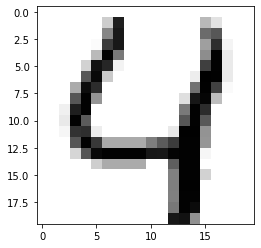

In [20]:
img = test_images[4]
print(type(img))
print(img.shape)
img = img.reshape(28, 28)
img = img[4:-4, 4:-4]

import matplotlib.pyplot as plt
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

## Building Blocks

In [26]:
def naive_relu(x):
    assert len(x.shape) == 2  # x is a 2D numpy tensor
    
    x = x.copy()  # don't overwrite the input tensor
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

import numpy as np

vec = np.array([[i*j for i in range(-5, 5)] for j in range(-5, 5)])
print(vec)
vec2 = naive_relu(vec)
print(vec2)

[[ 25  20  15  10   5   0  -5 -10 -15 -20]
 [ 20  16  12   8   4   0  -4  -8 -12 -16]
 [ 15  12   9   6   3   0  -3  -6  -9 -12]
 [ 10   8   6   4   2   0  -2  -4  -6  -8]
 [  5   4   3   2   1   0  -1  -2  -3  -4]
 [  0   0   0   0   0   0   0   0   0   0]
 [ -5  -4  -3  -2  -1   0   1   2   3   4]
 [-10  -8  -6  -4  -2   0   2   4   6   8]
 [-15 -12  -9  -6  -3   0   3   6   9  12]
 [-20 -16 -12  -8  -4   0   4   8  12  16]]
[[25 20 15 10  5  0  0  0  0  0]
 [20 16 12  8  4  0  0  0  0  0]
 [15 12  9  6  3  0  0  0  0  0]
 [10  8  6  4  2  0  0  0  0  0]
 [ 5  4  3  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  2  3  4]
 [ 0  0  0  0  0  0  2  4  6  8]
 [ 0  0  0  0  0  0  3  6  9 12]
 [ 0  0  0  0  0  0  4  8 12 16]]


In [33]:
import numpy as np

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([0, 3, 1])
naive_matrix_vector_dot(x, y)

array([ 9., 21.])

# 25 Feb

In [ ]:
import numpy as np

def naive_relu(x):
    """Replace negative values with zero"""
    assert len(x.shape) == 2
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1])
            x[i, j] = max(x[i, j], 0)
    return x

def naive_add(x, y):
    """Element-wise add"""
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

def naive_vector_dot(x, y):
    """Dot product two vectors (sum of pairwise multiplications)"""
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

def naive_matrix_vector_dot(x, y):
    """Dot product a vector by a matrix"""
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

output = relu(dot(W, _input) + b)